<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-1">Exercise 1</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-2">Exercise 2</a></span></li><li><span><a href="#Exercise-3" data-toc-modified-id="Exercise-3-3">Exercise 3</a></span></li></ul></div>

# Solution Practice Sheet 3

##  Exercise 1 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("results.csv")

In [3]:
df.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False


Adding a column win/lose/tie column: We first create a list of conditions 

In [9]:
x=df['home_score']-df['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [10]:
values= ['win','lose','draw']

In [11]:
import numpy as np

In [12]:
df['result'] = np.select(conditions, values)

In [13]:
df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose


In [16]:
df['result'].value_counts()

lose    21009
win     12224
draw     9955
Name: result, dtype: int64

In [15]:
df['result'].value_counts(normalize=True)

lose    0.486455
win     0.283042
draw    0.230504
Name: result, dtype: float64

In [17]:
x=df['result'].value_counts()

In [18]:
x=np.array(x)

In [19]:
x

array([21009, 12224,  9955], dtype=int64)

In [20]:
N=x.sum()

In [21]:
N

43188

In [22]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [23]:
CI_win=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))

In [24]:
CI_win

(0.27879305599044235, 0.28729011526083115)

In [25]:
CI_lose=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))

In [26]:
CI_lose

(0.481740705905987, 0.49116843552218753)

In [28]:
CI_draw=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))

In [29]:
CI_draw

(0.2265318471530234, 0.23447584016752862)

In [31]:
df['country'].unique()

array(['Scotland', 'England', 'Wales', 'Ireland', 'United States',
       'Uruguay', 'Austria', 'Hungary', 'Argentina', 'Belgium', 'France',
       'Netherlands', 'Bohemia', 'Switzerland', 'Sweden', 'Germany',
       'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg', 'Russia',
       'Denmark', 'Spain', 'Japan', 'Brazil', 'Paraguay', 'China PR',
       'Canada', 'Estonia', 'Guatemala', 'Czechoslovakia', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Portugal',
       'Northern Ireland', 'Australia', 'Lithuania', 'Turkey', 'Mexico',
       'Aruba', 'Soviet Union', 'Haiti', 'Philippines', 'Bulgaria',
       'Jamaica', 'Kenya', 'Czech Republic', 'Peru', 'Honduras',
       'British Guyana', 'Uganda', 'El Salvador', 'Barbados',
       'Irish Free State', 'Trinidad and Tobago', 'Greece', 'Curaçao',
       'Egypt', 'Dominica', 'Guadeloupe', 'Palestine',
       'Netherlands Guyana', 'French Guiana', 'Cuba', 'Colombia',
       'Saint Kitts and Nevis', 'Éire', 'Panama', 'B

In [48]:
dfegy=df[df['country']=='Egypt']

In [49]:
dfegy.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,lose
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,lose
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,lose


Create a variable type of the match  `friendly/No friendly` and `home/away` match

In [61]:
conditions = [
    (dfegy['tournament']=='Friendly'),
    (dfegy['tournament']!='Friendly')
    ]

In [62]:
values=['Friendly','Official']

In [63]:
dfegy['typematch'] = np.select(conditions, values)

C:\Users\dhafe\AppData\Local\Temp/ipykernel_22052/2597929672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['typematch'] = np.select(conditions, values)


In [64]:
dfegy['typematch'].value_counts()

Official    226
Friendly    181
Name: typematch, dtype: int64

Comparing the probability of win/lose/draw by type of match 

In [79]:
x=pd.crosstab(dfegy['typematch'],dfegy['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,37,99,45,181
Official,40,139,47,226
All,77,238,92,407


In [68]:
x=np.array(x)
x

array([[ 37,  99,  45, 181],
       [ 40, 139,  47, 226],
       [ 77, 238,  92, 407]], dtype=int64)

In [69]:
CI_egywin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_egywin_friendly
                                                          

(0.1856528084886489, 0.3115847605721246)

In [70]:
CI_egywin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_egywin_official

(0.1550517855722795, 0.2608774179675435)

Plotting the Confidence intervals 

In [71]:
ci_egywin = {}
ci_egywin['Typematch'] = ['Friendly','Official']
ci_egywin['lb'] = [CI_egywin_friendly[0],CI_egywin_official[0]]
ci_egywin['ub'] = [CI_egywin_friendly[1],CI_egywin_official[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,Typematch,lb,ub
0,Friendly,0.185653,0.311585
1,Official,0.155052,0.260877


([<matplotlib.axis.YTick at 0x29124546f70>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

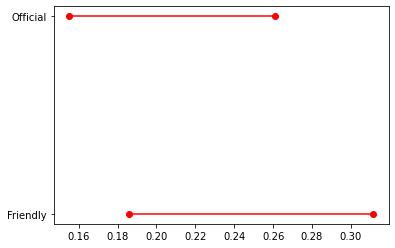

In [72]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

Let's now check out the impact of fans on the match results. We will compare the probability of winning between home matches and away matches.

In [77]:
dfegy['home']=(dfegy['home_team']=='Egypt')

C:\Users\dhafe\AppData\Local\Temp/ipykernel_22052/2175071764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['home']=(dfegy['home_team']=='Egypt')


In [78]:
dfegy['home'].value_counts()

True     258
False    149
Name: home, dtype: int64

In [80]:
x=pd.crosstab(dfegy['home'],dfegy['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,33,67,49,149
True,44,171,43,258
All,77,238,92,407


In [81]:
dfegy.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,typematch,home
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw,Friendly,True
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,lose,Official,True
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,lose,Friendly,True
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw,Friendly,True


In [83]:
x=np.array(x)
x

array([[ 33,  67,  49, 149],
       [ 44, 171,  43, 258],
       [ 77, 238,  92, 407]], dtype=int64)

In [84]:
CI_egywin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_egywin_home

(0.12119174183927744, 0.21214159149405587)

In [85]:
CI_egywin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_egywin_away

(0.25342513144684364, 0.40429298935852553)

In [86]:
ci_egywin = {}
ci_egywin['home'] = ['Yes','No']
ci_egywin['lb'] = [CI_egywin_home[0],CI_egywin_away[0]]
ci_egywin['ub'] = [CI_egywin_home[1],CI_egywin_away[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

,home,lb,ub
0,Yes,0.121192,0.212142
1,No,0.253425,0.404293


([<matplotlib.axis.YTick at 0x29124e6bdc0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

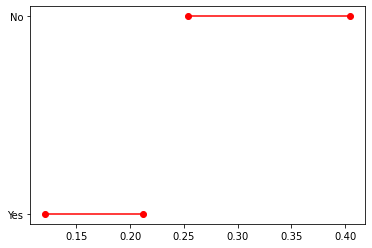

In [87]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

## Exercise 2

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [6]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [4]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [8]:
import numpy as np

In [9]:
dfegy=df[df['country']=='Egypt']

In [10]:
stats=dfegy.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [11]:
stats

dcases                 
                mean         std size
weekdays                             
Fri       567.161616  428.533849   99
Sat       558.806122  421.803605   98
Sun       545.520408  422.358748   98
Mon       561.846939  442.137949   98
Tue       566.153061  419.125460   98
Wed       561.479592  406.337812   98
Thu       567.683673  410.020004   98

In [138]:
import numpy as np
import scipy 

In [139]:
stats.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [140]:
ci95_hi = []
ci95_lo = []

In [141]:
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [142]:
ci95_hi

[653.0661477518557,
 643.8071867945697,
 630.633343760431,
 650.9457415593621,
 650.614430845941,
 643.3640186561778,
 650.3101288341297]

In [143]:
ci95_lo

[481.2570845713766,
 473.80505810338957,
 460.4074725660996,
 472.74813599165833,
 481.6916916030385,
 479.5951650172916,
 485.0572181046457]

In [144]:
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

              dcases                      ci95_hi     ci95_lo
                mean         std size                        
weekdays                                                     
Fri       567.161616  428.533849   99  653.066148  481.257085
Sat       558.806122  421.803605   98  643.807187  473.805058
Sun       545.520408  422.358748   98  630.633344  460.407473
Mon       561.846939  442.137949   98  650.945742  472.748136
Tue       566.153061  419.125460   98  650.614431  481.691692
Wed       561.479592  406.337812   98  643.364019  479.595165
Thu       567.683673  410.020004   98  650.310129  485.057218


In [145]:
df_ci= pd.DataFrame(stats)

In [146]:
df_ci

dcases                      ci95_hi     ci95_lo
                mean         std size                        
weekdays                                                     
Fri       567.161616  428.533849   99  653.066148  481.257085
Sat       558.806122  421.803605   98  643.807187  473.805058
Sun       545.520408  422.358748   98  630.633344  460.407473
Mon       561.846939  442.137949   98  650.945742  472.748136
Tue       566.153061  419.125460   98  650.614431  481.691692
Wed       561.479592  406.337812   98  643.364019  479.595165
Thu       567.683673  410.020004   98  650.310129  485.057218

In [150]:
df_ci.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [151]:
df_ci['weekdays']=df_ci.index

In [152]:
df_ci

dcases                      ci95_hi     ci95_lo weekdays
                mean         std size                                 
weekdays                                                              
Fri       567.161616  428.533849   99  653.066148  481.257085      Fri
Sat       558.806122  421.803605   98  643.807187  473.805058      Sat
Sun       545.520408  422.358748   98  630.633344  460.407473      Sun
Mon       561.846939  442.137949   98  650.945742  472.748136      Mon
Tue       566.153061  419.125460   98  650.614431  481.691692      Tue
Wed       561.479592  406.337812   98  643.364019  479.595165      Wed
Thu       567.683673  410.020004   98  650.310129  485.057218      Thu

In [148]:
df_ci.columns

MultiIndex([( 'dcases', 'mean'),
            ( 'dcases',  'std'),
            ( 'dcases', 'size'),
            ('ci95_hi',     ''),
            ('ci95_lo',     '')],
           )

In [147]:
import matplotlib.pyplot as plt

(400.0, 700.0)

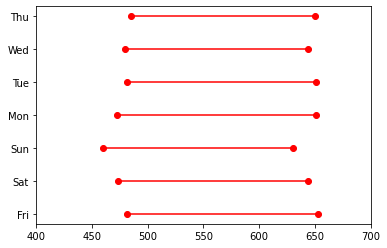

In [154]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['weekdays']))
plt.xlim([400, 700])

## Exercise 3

In [18]:
import numpy as np
from scipy.stats import norm,t
import pandas as pd

In [11]:
yM, sM, nM = 4.5,0.45,55

In [12]:
yF, sF, nF = 3.1,0.33,65

In [13]:
ciM=scipy.stats.t.interval(.95, nM-1, yM,np.sqrt(sM)/np.sqrt(nM-1))

In [14]:
ciM

(4.316980398278775, 4.683019601721225)

In [15]:
ciF=scipy.stats.t.interval(.95, nF-1, yF,np.sqrt(sF)/np.sqrt(nF-1))

In [16]:
ciF

(2.956548960673736, 3.2434510393262643)

In [19]:
ci = {}
ci['Gender'] = ['Male','Female']
ci['lb'] = [ciM[0],ciF[0]]
ci['ub'] = [ciM[1],ciF[1]]
df_ci= pd.DataFrame(ci)

([<matplotlib.axis.YTick at 0x2437a34c220>,
 [Text(0, 0, 'Male'), Text(0, 1, 'Female')])

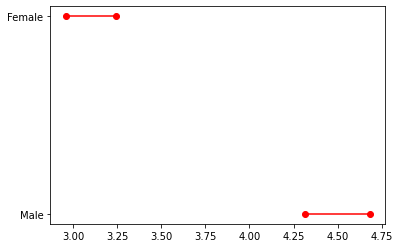

In [20]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Gender']))